# KNN 아이리스 2진 분류 (Binary Classification)
---

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [32]:
#!pip install scikit-learn --user

### 데이터 준비

In [33]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [34]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df = iris.drop(['Id'], axis=1)

In [36]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [40]:
df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [43]:
X = df.iloc[:, :-1] # [행, 열]
y = df.iloc[:, -1] # 원하는 인덱스

In [44]:
X = df.drop(['species'], axis=1) # 필요없는 열(species) 지우기
y = df['species']

X.shape, y.shape

((150, 4), (150,))

In [45]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### 테스트 데이터 분리

In [47]:
# 8:2로 분리
X, y = shuffle(X, y)

num = int(150 * 0.8)

X_train = X.iloc[:num, :] # 120
X_test = X.iloc[num:, :] # 30
y_train = y.iloc[:num] # 120
y_test = y.iloc[num:] # 30

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 정규화
- 최소-최대 정규화(이미지)
- 표준화(숫자)

![](https://mblogthumb-phinf.pstatic.net/MjAxODA3MzBfMjkg/MDAxNTMyOTQ5NjE5NDk1.uohi_UYv7kxff1HrJQu6OTrRg43hMjIS7m1C-0lqNhYg.51F66CkbCSlOPToVxSArKV7nP2-6Q0Z4tC3L9S22Qb8g.PNG.statsol/%ED%91%9C%EC%A4%80%ED%99%94%EA%B3%B5%EC%8B%9D2.png?type=w800)

In [48]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
36,5.5,3.5,1.3,0.2
133,6.3,2.8,5.1,1.5
25,5.0,3.0,1.6,0.2
113,5.7,2.5,5.0,2.0


In [49]:
mu = X_train['sepal_length'].mean()
std = X_train['sepal_length'].std()

mu, std

(5.826666666666667, 0.8079160174897677)

In [20]:
def scale(column):
    mu = column.mean()
    std = column.std()
    return (column - column.mean() / column.std())

In [50]:
for col in X_train:
    X_train[col] = scale(X_train[col])

C:\Users\007\AppData\Local\Temp\ipykernel_5036\3372955362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = scale(X_train[col])


In [51]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
120,-0.311971,-3.667349,3.584359,0.742741
36,-1.711971,-3.367349,-0.815641,-1.357259
133,-0.911971,-4.067349,2.984359,-0.057259
25,-2.211971,-3.867349,-0.515641,-1.357259
113,-1.511971,-4.367349,2.884359,0.442741


In [52]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,-1.385304,0.807916,-2.911971,-2.111971,-1.411971,-0.886971,0.488029
sepal_width,120.0,-3.804016,0.446072,-4.867349,-4.067349,-3.867349,-3.542349,-2.467349
petal_length,120.0,1.597692,1.755181,-1.115641,-0.540641,2.134359,2.984359,4.784359
petal_width,120.0,-0.375592,0.758812,-1.457259,-1.257259,-0.257259,0.242741,0.942741


In [53]:
# pandas -> numpy 타입 변경
X_train = X_train.values
y_train = y_train.values

In [54]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 데이터 전처리 함수

In [55]:
def get_iris(mode=None):
    # 파일 읽기
    iris = pd.read_csv('iris.csv')
    # id 데이터 제거
    df = iris.drop(['Id'], axis=1)
    # 컬럼명 변경
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    if mode == 'bin':
        df = df.loc[df['species']!='Iris-virginica']
    # 인코딩
    df['species'] = df['species'].map({
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    })
    # X, y 분리
    X = df.iloc[:, :-1] # [행, 열]
    y = df.iloc[:, -1] # 원하는 인덱스
    # 데이터 섞기
    X, y = shuffle(X, y) 
    # random_state = 2022 이렇게 고정하면  누구나 같은 결과값이 나온다. 
    # 8:2로 분리
    num = int(len(y) * 0.8)
    X_train = X.iloc[:num, :] # 120
    X_test = X.iloc[num:, :] # 30
    y_train = y.iloc[:num] # 120
    y_test = y.iloc[num:] # 30
    
    # 정규화(표준화)
    for col in X_train:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu) / std
        X_test[col] = (X_test[col] - mu) / std
    
    return X_train, X_test, y_train, y_test

In [56]:
X_train, X_test, y_train, y_test = get_iris('bin')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


C:\Users\007\AppData\Local\Temp\ipykernel_5036\3418529765.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu) / std
C:\Users\007\AppData\Local\Temp\ipykernel_5036\3418529765.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col] - mu) / std


In [57]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# 이진 데이터 준비
---

In [58]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [59]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
df = iris.loc[iris['Species']!='Iris-virginica']
df.shape

(100, 6)

In [62]:
df = df.drop(['Id'], axis=1)
df.shape

(100, 5)

In [63]:
# 컬럼명 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [65]:
# 인코딩
df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1
})

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
# X, y 분리
X = df.iloc[:, :-1] # [행, 열]
y = df.iloc[:, -1] # 원하는 인덱스

In [68]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [69]:
# 데이터 섞기
X, y = shuffle(X, y)

In [70]:
# 8:2로 분리
num = int(100 * 0.8)
X_train = X.iloc[:num, :] # 120
X_test = X.iloc[num:, :] # 30
y_train = y.iloc[:num] # 120
y_test = y.iloc[num:] # 30

In [71]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [72]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
26,5.0,3.4,1.6,0.4
7,5.0,3.4,1.5,0.2
31,5.4,3.4,1.5,0.4
3,4.6,3.1,1.5,0.2
24,4.8,3.4,1.9,0.2
...,...,...,...,...
55,5.7,2.8,4.5,1.3
39,5.1,3.4,1.5,0.2
68,6.2,2.2,4.5,1.5
38,4.4,3.0,1.3,0.2


### 학습

In [73]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 평가

In [74]:
# 테스트 정확도
clf.score(X_test, y_test)

1.0

In [75]:
# 학습 정확도
clf.score(X_train, y_train)

1.0

In [76]:
# 예측
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [77]:
# 실제 값
y_test

44    0
66    1
29    0
58    1
10    0
94    1
30    0
1     0
8     0
81    1
85    1
43    0
84    1
33    0
89    1
92    1
70    1
27    0
42    0
50    1
Name: species, dtype: int64

In [78]:
# 정확도
(y_pred == y_test).sum()/len(y_pred)

1.0

In [79]:
# 평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [80]:
def print_score(y_true, y_pred):
    # 정확도
    acc = accuracy_score(y_true, y_pred)
    # 정밀도
    pre = precision_score(y_true, y_pred)
    # 재현율
    rec = recall_score(y_true, y_pred)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', pre)

In [81]:
print_score(y_test, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


### 혼동행렬(Confusion Matrix)

In [82]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[10,  0],
       [ 0, 10]], dtype=int64)

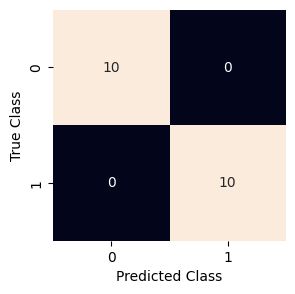

In [83]:
plt.figure(figsize=(3, 3))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show() 